In [1]:
import pandas as pd

In [25]:
df_non_batchcorrected = pd.read_csv('/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Labeled_Data_Only.csv')

print(df_non_batchcorrected.head())

   Unnamed: 0  GSM107072;Pawitan  GSM107073;Pawitan  GSM107074;Pawitan  \
0          10           -0.50715            0.60264            0.57725   
1         100           -0.00914            0.05463           -0.45224   
2        1000            0.60264           -0.13815            0.07469   
3       10000            0.33471           -0.42850           -0.57794   
4       10001           -0.10111            0.28111           -0.28099   

   GSM107075;Pawitan  GSM107076;Pawitan  GSM107077;Pawitan  GSM107078;Pawitan  \
0            0.13745           -0.15077            0.38406            0.13014   
1           -0.31282           -0.10731           -0.15715            0.08815   
2            0.15237           -0.20953           -0.08262           -0.55791   
3            0.08815           -0.11336           -0.62383            0.01589   
4           -0.44019           -0.29659           -0.21634            0.19153   

   GSM107079;Pawitan  GSM107080;Pawitan  ...  TCGA-AO-A126-01;TCGA  

In [26]:
df_non_batchcorrected_ = df_non_batchcorrected.iloc[:, 1:]
print(df_non_batchcorrected_)

       GSM107072;Pawitan  GSM107073;Pawitan  GSM107074;Pawitan  \
0               -0.50715            0.60264            0.57725   
1               -0.00914            0.05463           -0.45224   
2                0.60264           -0.13815            0.07469   
3                0.33471           -0.42850           -0.57794   
4               -0.10111            0.28111           -0.28099   
...                  ...                ...                ...   
11743            0.51157            0.08142           -0.16972   
11744           -0.13192            0.66232            0.39748   
11745           -0.14443           -0.57794           -0.20953   
11746           -0.10731           -0.62383           -0.23696   
11747            0.27132            1.44252           -0.26579   

       GSM107075;Pawitan  GSM107076;Pawitan  GSM107077;Pawitan  \
0                0.13745           -0.15077            0.38406   
1               -0.31282           -0.10731           -0.15715   
2        

In [27]:
df_filtered = df_non_batchcorrected_.drop([col for col in df_non_batchcorrected_.columns if 'Loi' in col or 'Ivshina' in col], axis=1)
print(df_filtered.shape)

(11748, 3970)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled = scaler.fit_transform(df_filtered)
print(df_scaled)

[[-0.62186646  0.3013314   0.2802103  ... -0.38104191 -0.29653285
  -0.42651095]
 [-0.20758829 -0.15454012 -0.57618863 ... -0.38735344 -0.3095294
   0.3857168 ]
 [ 0.3013314  -0.31490748 -0.13785287 ... -0.43676719  0.23014008
  -0.27341855]
 ...
 [-0.3201316  -0.68075434 -0.37428615 ...  0.2085575   0.05435303
  -0.48041915]
 [-0.28925269 -0.71892872 -0.39710427 ...  0.14609264 -0.329895
   0.04628316]
 [ 0.02571717  1.         -0.421087   ...  0.3857168   0.074513
   0.50166601]]


In [29]:
df_scaled = pd.DataFrame(df_scaled, columns=df_filtered.columns.values.tolist())
print(df_scaled)

       GSM107072;Pawitan  GSM107073;Pawitan  GSM107074;Pawitan  \
0              -0.621866           0.301331           0.280210   
1              -0.207588          -0.154540          -0.576189   
2               0.301331          -0.314907          -0.137853   
3               0.078449          -0.556440          -0.680754   
4              -0.284095           0.033861          -0.433731   
...                  ...                ...                ...   
11743           0.225573          -0.132254          -0.341170   
11744          -0.309725           0.350977           0.130666   
11745          -0.320132          -0.680754          -0.374286   
11746          -0.289253          -0.718929          -0.397104   
11747           0.025717           1.000000          -0.421087   

       GSM107075;Pawitan  GSM107076;Pawitan  GSM107077;Pawitan  \
0              -0.085645          -0.325406           0.119502   
1              -0.460210          -0.289253          -0.330713   
2        

In [30]:
df_scaled_transposed = df_scaled.T
print(df_scaled_transposed)

                         0         1         2         3         4      \
GSM107072;Pawitan    -0.621866 -0.207588  0.301331  0.078449 -0.284095   
GSM107073;Pawitan     0.301331 -0.154540 -0.314907 -0.556440  0.033861   
GSM107074;Pawitan     0.280210 -0.576189 -0.137853 -0.680754 -0.433731   
GSM107075;Pawitan    -0.085645 -0.460210 -0.073233 -0.126656 -0.566165   
GSM107076;Pawitan    -0.325406 -0.289253 -0.374286 -0.294285 -0.446709   
...                        ...       ...       ...       ...       ...   
TCGA-E2-A108-01;TCGA  0.024348  0.351599 -0.045297  0.221185 -0.355313   
TCGA-BH-A0B2-01;TCGA -0.007919  0.215465 -0.033068  0.242696 -0.069213   
TCGA-AO-A12B-01;TCGA -0.381042 -0.387353 -0.436767 -0.470851 -0.768362   
TCGA-E2-A109-01;TCGA -0.296533 -0.309529  0.230140 -0.296533 -0.006496   
TCGA-AO-A128-01;TCGA -0.426511  0.385717 -0.273419 -0.257069  0.024348   

                         5         6         7         8         9      ...  \
GSM107072;Pawitan    -0.137853 -

In [31]:
df_scaled_transposed.to_csv('/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Scaled_Batch-un-corrected_Labeled_Filtered_Data_Only.csv')

Add metadata to label file

In [ ]:
import pandas as pd
df_patient_info = pd.read_csv("/hpc/compgen/projects/cancer_gene_expression_representation_learning/raw/SyNetData/Patient_information.csv")
df_patient_info

In [ ]:
df_patient_info['ID_Study'] = df_patient_info.PatientID + df_patient_info.StudyName

In [ ]:
df_patient_info.set_index(['ID_Study'])

ER status

In [ ]:
from collections import Counter
import pandas as pd
df_patient_info = pd.read_csv("/hpc/compgen/projects/cancer_gene_expression_representation_learning/raw/SyNetData/Patient_information.csv")
ER_list = df_patient_info['ERStatus'].tolist()

# Counter(ER_list)

In [6]:
subtype_list = df_patient_info['Subtype'].tolist()
Counter(subtype_list)

Counter({'LumB': 1059,
         'LumA': 1535,
         'Basal': 721,
         'Normal': 312,
         'Her2': 487,
         'NC': 6,
         nan: 9})

Below are tests

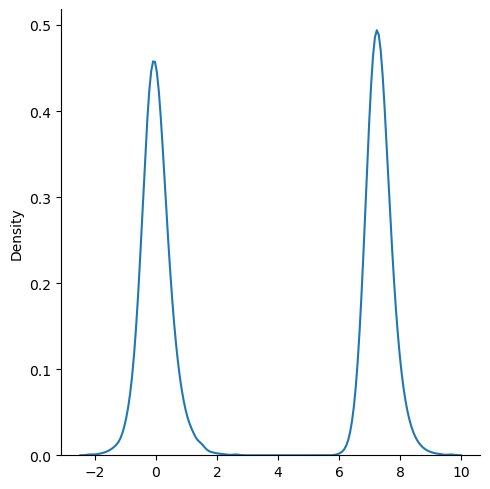

In [12]:
import seaborn as sns

data = df_filtered_transposed.to_numpy().flatten()
sns.displot(data, kind="kde")

In [32]:
df_surv_labeled = pd.read_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Surv_Labeled.csv", index_col=[0])
df_surv_labeled

,0,1,2,3,4,5,6,7,8,9,...,11739,11740,11741,11742,11743,11744,11745,11746,11747,Surv_label
GSM107072;Pawitan,3.629049,4.332263,5.242035,4.884504,4.219822,4.509033,4.348685,4.136162,4.211880,5.083470,...,4.268632,4.725725,4.913044,4.312997,5.114423,4.181805,4.164249,4.194224,4.762019,0
GSM107073;Pawitan,5.280801,4.463688,4.169501,3.731322,4.804504,4.094147,3.744131,4.023317,4.996263,4.613064,...,3.668400,3.700765,5.276134,4.640439,4.500965,5.370797,3.530899,3.458629,6.531339,1
GSM107074;Pawitan,5.242942,3.707902,4.486855,3.508488,3.966309,4.816731,3.452848,4.892969,4.955476,4.372226,...,2.947763,5.033894,4.401167,4.951779,4.126470,4.975893,4.080236,4.035481,3.983910,1
GSM107075;Pawitan,4.587148,3.915789,4.602680,4.501715,3.728912,5.101369,4.454705,5.733619,3.577702,3.491428,...,4.340441,4.052506,4.539640,4.163752,3.129959,4.656618,4.360459,5.151594,4.087891,1
GSM107076;Pawitan,4.157379,4.222221,4.063071,4.201238,3.943046,4.353318,4.621604,4.592652,4.295751,4.216818,...,4.443478,4.342876,3.910991,4.490480,4.164182,5.065881,4.060047,3.714482,4.630151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E2-A108-01;TCGA,4.639975,5.317841,4.501536,5.035724,3.866932,4.186158,5.461716,5.152850,3.940720,5.500393,...,4.948575,3.997965,3.898589,5.055530,4.209458,3.875621,4.264133,4.589717,4.055908,0
TCGA-BH-A0B2-01;TCGA,4.573905,5.039106,4.526575,5.079771,4.452758,4.192912,5.139907,4.730859,3.750266,4.550624,...,4.574736,4.276593,3.398584,4.377299,4.283245,4.281827,4.978350,4.216605,4.672804,0
TCGA-AO-A12B-01;TCGA,3.810780,3.794421,3.690796,3.623044,3.016945,4.621034,5.038800,3.515753,4.656313,4.926070,...,4.404076,3.588396,4.573813,3.489220,3.590420,4.171533,5.020761,4.889360,5.377599,1
TCGA-E2-A109-01;TCGA,3.982940,3.964181,5.065513,3.975642,4.581178,4.652957,4.545026,4.263747,4.670502,4.547814,...,3.840754,3.857569,5.884538,3.408843,4.048129,4.584197,4.708747,3.924691,4.746932,0


In [48]:
df_surv_labels = df_surv_labeled[["Surv_label"]]
df_surv_labels

,Surv_label
GSM107072;Pawitan,0
GSM107073;Pawitan,1
GSM107074;Pawitan,1
GSM107075;Pawitan,1
GSM107076;Pawitan,1
...,...
TCGA-E2-A108-01;TCGA,0
TCGA-BH-A0B2-01;TCGA,0
TCGA-AO-A12B-01;TCGA,1
TCGA-E2-A109-01;TCGA,0


In [49]:
df_surv_labels.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/Survival_labels.csv")